![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz


In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()


season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()


hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
season_metrics = bikes.groupby('season')['total'].describe()

# Métricas para 'hour' (usando el dataset que tiene datos por horas)
hour_metrics = bikes.groupby('hour')['total'].describe()

season_metrics, hour_metrics


(         count        mean         std  min   25%    50%    75%    max
 season                                                                
 1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
 2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
 3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
 4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0,
       count        mean         std   min     25%    50%     75%    max
 hour                                                                   
 0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
 1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
 2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
 3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
 4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
 5     452.0   19.767699   12.784293   1.0    8.00   19.

Para la variable season:

Primavera (1):
Alquiler promedio: 2604 bicicletas
Desviación estándar: 1399
Mínimo: 431 bicicletas
Máximo: 7836 bicicletas

Verano (2):
Alquiler promedio: 4992 bicicletas
Desviación estándar: 1695
Mínimo: 795 bicicletas
Máximo: 8362 bicicletas

Otoño (3):
Alquiler promedio: 5644 bicicletas
Desviación estándar: 1459
Mínimo: 1115 bicicletas
Máximo: 8714 bicicletas

Invierno (4):
Alquiler promedio: 4728 bicicletas
Desviación estándar: 1699
Mínimo: 22 bicicletas
Máximo: 8555 bicicletas

Para la variable hour (de 0 a 23):

Las horas con mayor alquiler promedio son las 17:00 (461 bicicletas) y las 18:00 (425 bicicletas).
Las horas con menor alquiler promedio son las 4:00 (6 bicicletas) y las 3:00 (11 bicicletas).
El alquiler de bicicletas aumenta significativamente durante las horas de inicio y finalización de la jornada laboral, lo que sugiere un uso importante de las bicicletas para el desplazamiento al trabajo y de regreso a casa.
Durante la noche y las primeras horas de la mañana, el alquiler es mucho menor, lo cual es esperado dado que son horas menos activas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

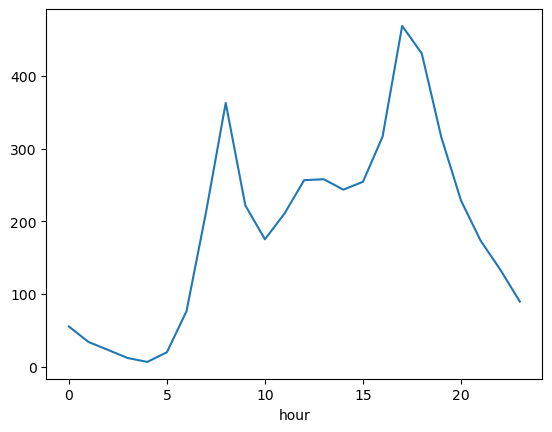

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()


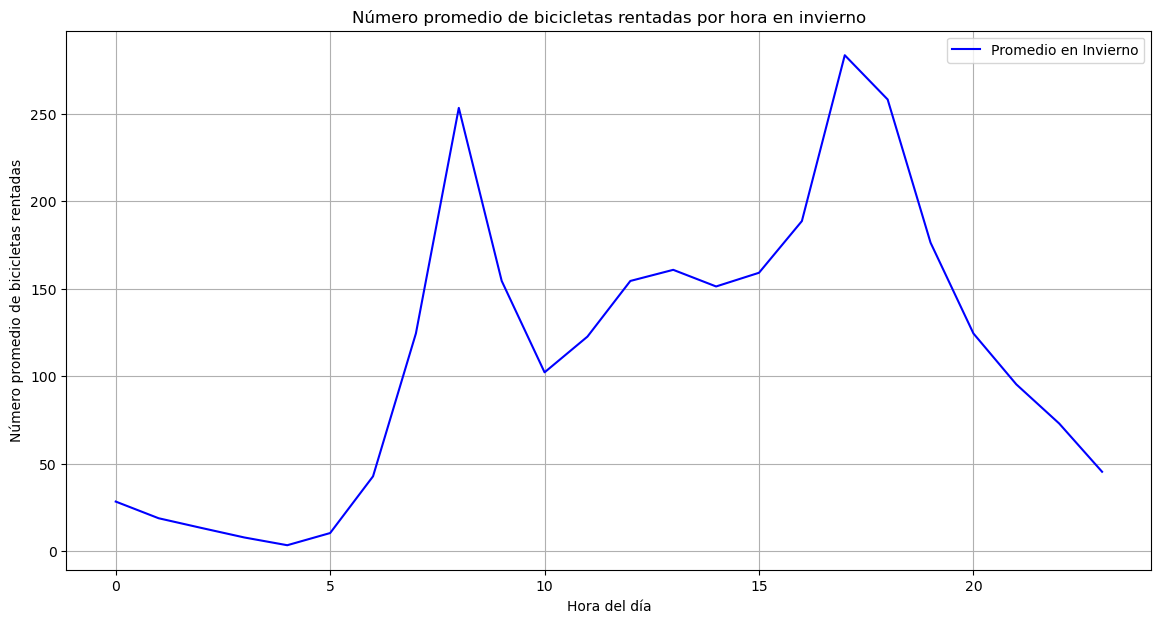

In [8]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

import matplotlib.pyplot as plt

# Filtrar los datos para invierno (season = 1)
winter_data = bikes[bikes['season'] == 1]


# Calcular el promedio de bicicletas rentadas por hora en invierno y verano
winter_hourly_avg = winter_data.groupby('hour')['total'].mean()


# Crear la gráfica para invierno y verano
plt.figure(figsize=(14, 7))
winter_hourly_avg.plot(label='Promedio en Invierno', color='blue')

# Añadir título y etiquetas
plt.title('Número promedio de bicicletas rentadas por hora en invierno')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.legend()
plt.grid(True)
plt.show()



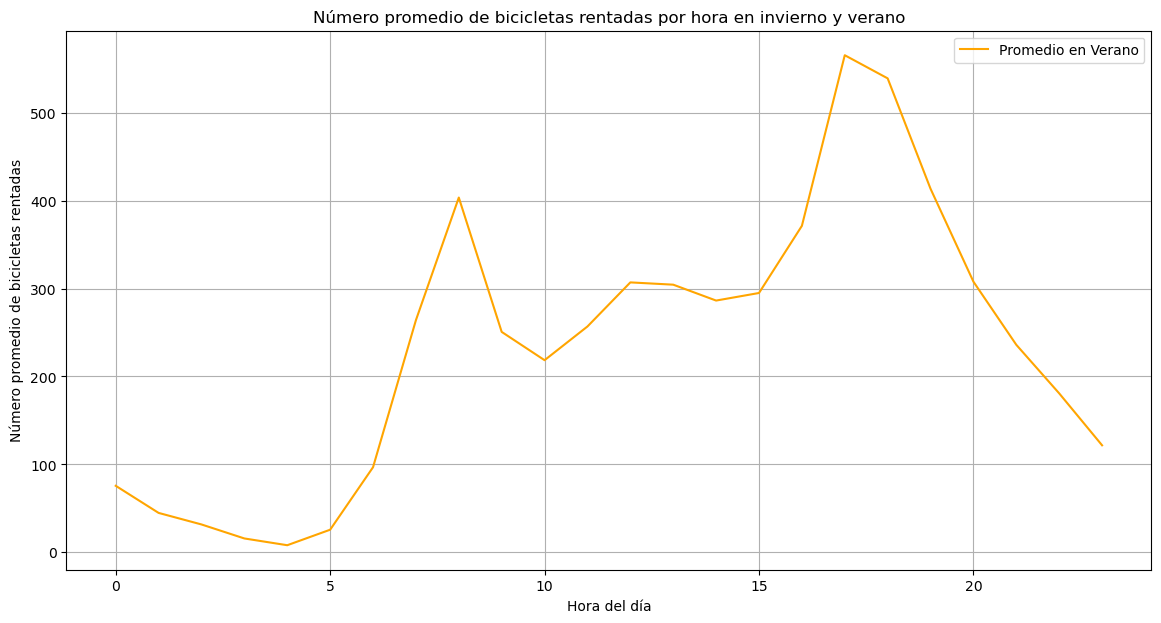

In [9]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

# Filtrar los datos para invierno verano (season = 3)
summer_data = bikes[bikes['season'] == 3]

# Calcular el promedio de bicicletas rentadas por hora en verano
summer_hourly_avg = summer_data.groupby('hour')['total'].mean()

# Crear la gráfica para invierno y verano
plt.figure(figsize=(14, 7))
summer_hourly_avg.plot(label='Promedio en Verano', color='orange')

# Añadir título y etiquetas
plt.title('Número promedio de bicicletas rentadas por hora en invierno y verano')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.legend()
plt.grid(True)
plt.show()


En ambas estaciones, se observan claros patrones diurnos con picos en ciertas horas del día, lo cual sugiere que el uso de bicicletas está altamente vinculado a las rutinas diarias como ir al trabajo o la escuela.

Durante el invierno, hay un pico notable alrededor de las 8 a.m., lo cual puede estar asociado con el desplazamiento matutino hacia actividades diurnas como el trabajo o la escuela.

En verano, el pico matutino es menos pronunciado que en invierno, pero existe un pico muy marcado alrededor de las 5 p.m. y 6 p.m., que es mucho más alto que cualquier otro momento del día. Esto podría deberse a que las personas prefieren disfrutar del clima y la luz del día más prolongada para actividades después del trabajo.

Las rentas durante el verano son significativamente más altas en comparación con el invierno, especialmente en las horas de la tarde. Esto sugiere que el clima más cálido y las horas extendidas de luz diurna promueven el uso de bicicletas.

Las rentas en invierno muestran un descenso más temprano después del pico de la tarde, posiblemente debido a que anochece más temprano y las temperaturas más frías desincentivan el uso de la bicicleta.

La actividad nocturna es más baja en ambas estaciones, pero hay un ligero aumento en las rentas durante las primeras horas de la noche en verano, posiblemente debido a actividades recreativas.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Seleccionar las variables predictoras y la variable de respuesta
X = bikes[['season', 'hour']]
y = bikes['total']

# Como 'season' es categórica, la convertiremos en variables dummy
column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), ['season'])],
    remainder='passthrough'
)

# Aplicar la transformación de OneHotEncoder a la variable 'season'
X_transformed = column_transformer.fit_transform(X)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_transformed, y)

# Imprimir los coeficientes del modelo
coefficients = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficients:', coefficients)


Intercept: -2335078637631.506
Coefficients: [2.33507864e+12 2.33507864e+12 2.33507864e+12 2.33507864e+12
 1.05456909e+01]


### limitaciones de la regresión lineal

Relación Lineal Presumida: La regresión lineal presupone que hay una relación lineal entre las variables predictoras y la variable de respuesta. Sin embargo, en muchos casos reales, incluido el alquiler de bicicletas, esta relación podría ser no lineal. Por ejemplo, el número de alquileres podría aumentar hasta cierta hora del día y luego disminuir, lo cual no se podría modelar correctamente con una línea recta.

Interacción entre Variables: La regresión lineal no captura las interacciones entre variables a menos que se especifiquen explícitamente. Por ejemplo, el efecto de la hora del día en el alquiler de bicicletas podría ser diferente en invierno que en verano, pero un modelo lineal simple no capturaría esta interacción a menos que se añada como una nueva variable de interacción.

Categorías de "Season": Tratar "season" como una variable categórica sin orden implica que no hay una tendencia natural o secuencial entre las estaciones. Un modelo que no reconoce el orden de las estaciones puede perder información importante.

Variables Influyentes Faltantes: Es probable que haya otras variables que afecten el número de alquileres, como el clima (temperatura, humedad, condiciones climáticas), días festivos, y eventos especiales que no están incluidas en el modelo.

Variabilidad no Explicada: Incluso con las variables relevantes incluidas, la regresión lineal asume que toda la variabilidad en la respuesta puede ser explicada por las variables predictoras. Sin embargo, siempre hay algo de variabilidad que es el resultado de factores no medidos o de la variabilidad intrínseca.

Escalado de Coeficientes: Los coeficientes extremadamente grandes o pequeños pueden ser un signo de que las variables necesitan ser escaladas o normalizadas.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [13]:
# Celda 4
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Seleccionar las variables predictoras y la variable de respuesta
X = bikes[['season', 'hour']]
y = bikes['total']

# Convertir 'season' en variables dummy porque es una variable categórica
column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), ['season'])],
    remainder='passthrough'
)

X = column_transformer.fit_transform(X)

# Crear el modelo de árbol de decisión
tree_regressor = DecisionTreeRegressor(min_samples_split=(len(X) // 6), random_state=42)

# Ajustar el modelo de árbol de decisión al conjunto de datos
tree_regressor.fit(X, y)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(tree_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Imprimir el RMSE promedio
print(f'RMSE promedio de validación cruzada: {rmse_scores.mean()}')

# Verificar la cantidad de nodos finales (hojas) del árbol
print(f'Número de nodos finales (hojas): {tree_regressor.get_n_leaves()}')



RMSE promedio de validación cruzada: 147.95064297150606
Número de nodos finales (hojas): 10


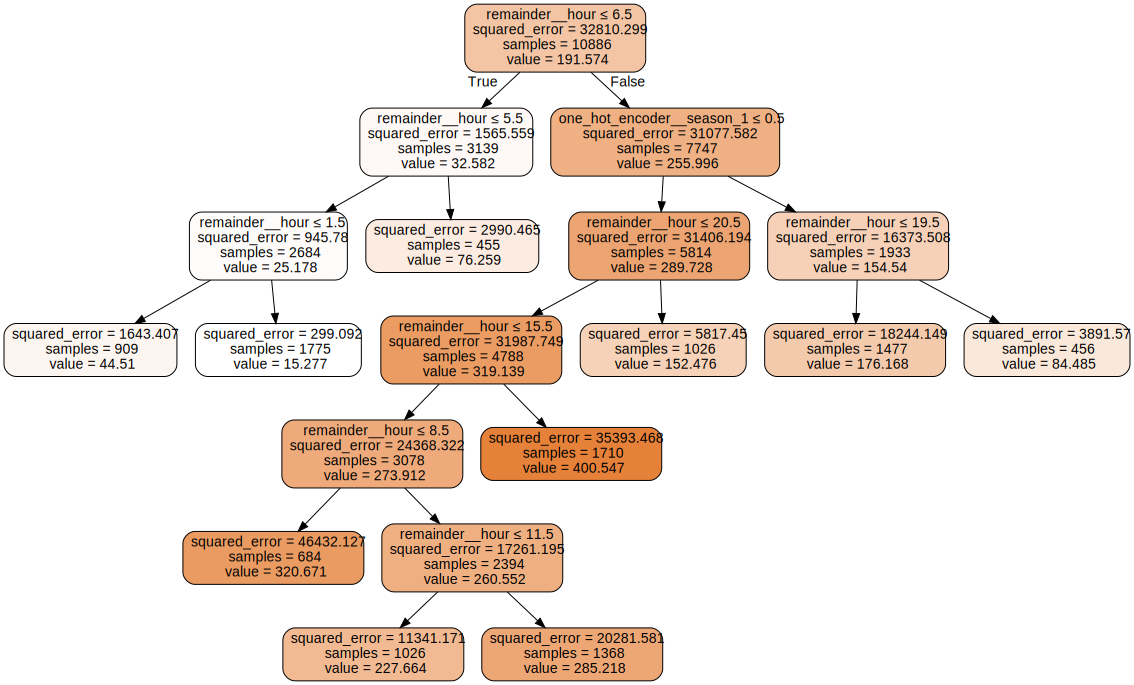

In [14]:
dot_data = export_graphviz(tree_regressor, out_file=None, 
                            feature_names=column_transformer.get_feature_names_out(),
                            filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [19]:
# Celda 5
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Preparar los datos nuevamente, aplicando OneHotEncoder a 'season' y utilizando 'hour' directamente
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
bikes.rename(columns={'count':'total'}, inplace=True)
bikes['hour'] = bikes.index.hour
X = bikes[['season', 'hour']]
y = bikes['total']
column_transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), ['season'])], remainder='passthrough')
X = column_transformer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el árbol de decisiones y un grid de parámetros para GridSearchCV
tree_regressor = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

# Inicializar y ajustar GridSearchCV
grid_search = GridSearchCV(tree_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_tree = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_tree.predict(X_test)

# Calcular RMSE para el conjunto de prueba
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar el mejor conjunto de parámetros y RMSE del mejor modelo
best_params = grid_search.best_params_
rmse_test, best_params

(115.98032517222038,
 {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10})

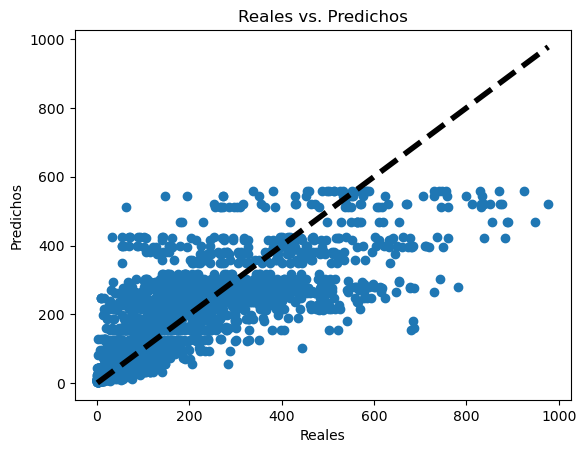

In [20]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Reales')
plt.ylabel('Predichos')
plt.title('Reales vs. Predichos')
plt.show()

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [24]:
# Lectura de la información de archivo .csv

df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [25]:

# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()


0.5

In [26]:

# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [27]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Árbol de decisión con calibración de parámetro
parametros = {'max_depth': range(1, 10)}
tree = GridSearchCV(DecisionTreeClassifier(random_state=1), parametros, scoring='accuracy')
tree.fit(X_train, y_train)

# Mejor árbol
mejor_arbol = tree.best_estimator_

# Regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=1)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_tree = mejor_arbol.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluación
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print(f"Árbol de Decisión - Accuracy: {accuracy_tree}, F1-Score: {f1_tree}")
print(f"Regresión Logística - Accuracy: {accuracy_log_reg}, F1-Score: {f1_log_reg}")



Árbol de Decisión - Accuracy: 0.6453333333333333, F1-Score: 0.6448598130841121
Regresión Logística - Accuracy: 0.624, F1-Score: 0.6104972375690608


El Árbol de Decisión tiene una exactitud ligeramente superior a la Regresión Logística, lo que indica que, en general, tiene un mejor rendimiento al predecir correctamente las etiquetas de los datos de prueba. Ademas el Árbol de Decisión supera a la Regresión Logística, sugiriendo que maneja mejor el equilibrio entre la precisión de sus predicciones y su capacidad para detectar la mayoría de los casos positivos relevantes.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [33]:
# Celda 7
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Crear los modelos: 200 árboles de decisión y 100 regresiones logísticas
decision_trees_depth = [DecisionTreeClassifier(max_depth=5) for _ in range(100)]
decision_trees_leaf = [DecisionTreeClassifier(min_samples_leaf=4) for _ in range(100)]
logistic_regressions = [LogisticRegression() for _ in range(100)]

# Entrenar los modelos
for model in decision_trees_depth + decision_trees_leaf + logistic_regressions:
    model.fit(X_train, y_train)

# Función para evaluar modelos individualmente
def evaluate_models(models, X_test, y_test):
    accuracies = []
    f1_scores = []
    for model in models:
        predictions = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, predictions))
        f1_scores.append(f1_score(y_test, predictions))
    return np.mean(accuracies), np.mean(f1_scores)

# Evaluar cada grupo de modelos
acc_dt_depth, f1_dt_depth = evaluate_models(decision_trees_depth, X_test, y_test)
acc_dt_leaf, f1_dt_leaf = evaluate_models(decision_trees_leaf, X_test, y_test)
acc_lr, f1_lr = evaluate_models(logistic_regressions, X_test, y_test)

# Realizar votación mayoritaria para el ensamble
def majority_vote(models, X_test):
    predictions = np.array([model.predict(X_test) for model in models])
    majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
    return majority_vote

ensemble_predictions = majority_vote(decision_trees_depth + decision_trees_leaf + logistic_regressions, X_test)

# Evaluar el ensamble completo
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)

# Imprimir los resultados
print(f"Accuracy y F1-Score de árboles de decisión con max_depth: {acc_dt_depth}, {f1_dt_depth}")
print(f"Accuracy y F1-Score de árboles de decisión con min_samples_leaf: {acc_dt_leaf}, {f1_dt_leaf}")
print(f"Accuracy y F1-Score de regresiones logísticas: {acc_lr}, {f1_lr}")
print(f"Accuracy y F1-Score del ensamble: {ensemble_accuracy}, {ensemble_f1}")



Accuracy y F1-Score de árboles de decisión con max_depth: 0.6386399999999999, 0.6625000930509546
Accuracy y F1-Score de árboles de decisión con min_samples_leaf: 0.55212, 0.5491301842048033
Accuracy y F1-Score de regresiones logísticas: 0.6139999999999999, 0.6095751854349291
Accuracy y F1-Score del ensamble: 0.6226666666666667, 0.6310299869621905


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [34]:
# Celda 8
from sklearn.model_selection import cross_val_score

# Entrenar los modelos y calcular sus pesos basados en la precisión de cross-validation
weights_dt_depth = [np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')) for model in decision_trees_depth]
weights_dt_leaf = [np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')) for model in decision_trees_leaf]
weights_lr = [np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')) for model in logistic_regressions]

# Función para realizar votación ponderada
def weighted_vote(models, weights, X_test):
    predictions = np.array([model.predict(X_test) for model in models])
    weighted_votes = np.zeros(predictions.shape[1])  # Inicializar arreglo de votos ponderados
    
    for i in range(len(models)):
        weighted_votes += weights[i] * predictions[i]
    
    # La predicción final es la clase con el mayor voto ponderado
    final_predictions = np.where(weighted_votes > np.mean(weights) * len(models) / 2, 1, 0)
    return final_predictions

# Realizar votación ponderada para el ensamble
ensemble_predictions_weighted = weighted_vote(decision_trees_depth + decision_trees_leaf + logistic_regressions,
                                               weights_dt_depth + weights_dt_leaf + weights_lr, X_test)

# Evaluar el ensamble completo
ensemble_accuracy_weighted = accuracy_score(y_test, ensemble_predictions_weighted)
ensemble_f1_weighted = f1_score(y_test, ensemble_predictions_weighted)

# Imprimir los resultados
print(f"Accuracy y F1-Score del ensamble con votación ponderada: {ensemble_accuracy_weighted}, {ensemble_f1_weighted}")


Accuracy y F1-Score del ensamble con votación ponderada: 0.6253333333333333, 0.6326797385620915


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
## Resultados de los Modelos Individuales
Árboles de decisión con max_depth definido: Lograron una precisión (Accuracy) de 0.6386 y un F1-Score de 0.6625, lo que indica un desempeño relativamente bueno y equilibrado entre precisión y recall, dado el valor de F1.

Árboles de decisión con min_samples_leaf definido: Mostraron un desempeño más bajo con una precisión de 0.5521 y un F1-Score de 0.5491, lo que sugiere que este parámetro, en la configuración seleccionada, no fue óptimo para el conjunto de datos.

Regresiones logísticas: Presentaron un desempeño intermedio con una precisión de 0.6140 y un F1-Score de 0.6096, siendo modelos más estables y generalizables en comparación con los árboles de decisión con min_samples_leaf.


## Resultados de los Ensamblajes
Votación mayoritaria: Al combinar los 300 modelos, el ensamble logró una precisión de 0.6227 y un F1-Score de 0.6310. Este desempeño está por encima del desempeño de los árboles de decisión con min_samples_leaf y las regresiones logísticas, pero no supera el de los árboles de decisión con max_depth.

Votación ponderada: Esta metodología proporcionó un ligero incremento en el desempeño, con una precisión de 0.6253 y un F1-Score de 0.6327. Este resultado es ligeramente superior al obtenido con la votación mayoritaria.

## Comparación y Análisis
Mejora a través del Ensamblaje: Ambos métodos de ensamble mejoraron la precisión y el F1-Score sobre algunos de los modelos individuales, demostrando el valor de combinar múltiples modelos para mejorar la generalización. La votación ponderada, al considerar el desempeño individual de cada modelo, ofreció una mejora adicional, aunque modesta, sobre la votación mayoritaria.

Votación Mayoritaria vs. Ponderada: La votación ponderada tuvo un desempeño ligeramente superior, lo que sugiere que dar más peso a los modelos con mejor desempeño puede ser beneficioso. Sin embargo, la mejora fue mínima, lo que podría indicar que la distribución de la precisión entre los modelos no varía drásticamente, o que el conjunto de datos no se beneficia significativamente de este enfoque ponderado.


## Ventajas y Desventajas
Votación Mayoritaria:
Ventajas: Simplicidad en la implementación y menos susceptibilidad a sobreajustar por modelos individuales con alto desempeño pero posiblemente sobreajustados.
Desventajas: No distingue entre modelos de alto y bajo desempeño, potencialmente diluyendo la influencia de los modelos más precisos.


Votación Ponderada:
Ventajas: Mejora el desempeño al dar más peso a los modelos con mejor precisión, lo cual es particularmente útil cuando hay una variabilidad significativa en el desempeño de los modelos individuales.
Desventajas: Puede ser más susceptible al sobreajuste si los pesos se basan excesivamente en el desempeño en el conjunto de entrenamiento. Además, requiere una validación cruzada adicional o un conjunto de validación para determinar los pesos, lo que incrementa la complejidad computacional.
